## $I. Load Data:$

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
path = '/content/gdrive/MyDrive/Data/Hangtieudung.csv'

In [ ]:
df = pd.read_csv(path) 
df.head(10) 

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
0,0,TSC,2021-12-01,15:12:03,HOSE,STOCK,18.50,19.75,17.25,18.55,...,16.522,5479900.0,1.007037e+11,0.0,0.000000e+00,0.10,0.0899,0.5405,2021-12-01,Hàng tiêu dùng
1,1,VCF,2021-12-01,15:12:03,HOSE,STOCK,246.00,263.20,228.80,246.00,...,0.000,0.0,0.000000e+00,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-01,Hàng tiêu dùng
2,4,LAF,2021-12-01,15:12:03,HOSE,STOCK,23.00,24.60,21.40,23.30,...,23.360,3500.0,8.176000e+07,0.0,0.000000e+00,0.30,0.3000,1.3043,2021-12-01,Hàng tiêu dùng
3,20,NHT,2021-12-03,15:12:06,HOSE,STOCK,36.90,39.45,34.35,36.90,...,30.540,15400.0,5.644250e+08,0.0,0.000000e+00,-0.70,-0.5833,-1.8970,2021-12-03,Hàng tiêu dùng
4,24,BHN,2021-12-01,15:12:03,HOSE,STOCK,61.90,66.20,57.60,61.90,...,59.606,5200.0,3.222100e+08,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-01,Hàng tiêu dùng
5,25,FTM,2021-12-01,15:12:03,HOSE,STOCK,5.93,6.34,5.52,5.90,...,6.070,951500.0,5.773719e+09,0.0,0.000000e+00,0.13,0.1300,2.1922,2021-12-01,Hàng tiêu dùng
6,26,HNG,2021-12-01,15:12:03,HOSE,STOCK,8.82,9.43,8.21,8.71,...,8.850,5890700.0,5.212342e+10,0.0,0.000000e+00,0.07,0.0700,0.7937,2021-12-01,Hàng tiêu dùng
7,27,SAB,2021-12-01,15:12:03,HOSE,STOCK,154.00,164.70,143.30,158.00,...,152.931,52000.0,8.127500e+09,30000.0,4.941000e+09,2.50,2.4461,1.6234,2021-12-01,Hàng tiêu dùng
8,60,VTJ,2021-12-03,15:12:08,HNX,STOCK,7.80,8.50,7.10,7.80,...,7.532,18013.0,1.356714e+08,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-03,Hàng tiêu dùng
9,66,TFC,2021-12-03,15:12:08,HNX,STOCK,10.70,11.70,9.70,11.00,...,9.773,2000.0,2.154000e+07,0.0,0.000000e+00,0.00,0.0000,0.0000,2021-12-03,Hàng tiêu dùng


In [ ]:
df.shape

(177153, 28)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177153 entries, 0 to 177152
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      177153 non-null  int64  
 1   code            177153 non-null  object 
 2   date            177153 non-null  object 
 3   time            177153 non-null  object 
 4   floor           177153 non-null  object 
 5   type            177153 non-null  object 
 6   basicPrice      177153 non-null  float64
 7   ceilingPrice    177153 non-null  float64
 8   floorPrice      177153 non-null  float64
 9   open            177153 non-null  float64
 10  high            177153 non-null  float64
 11  low             177153 non-null  float64
 12  close           177153 non-null  float64
 13  average         177153 non-null  float64
 14  adOpen          177153 non-null  float64
 15  adHigh          177153 non-null  float64
 16  adLow           177153 non-null  float64
 17  adClose   

In [ ]:
df.duplicated().sum() #No null values

0

In [ ]:
df = df.dropna()

In [ ]:
df['code'].value_counts() #Choose top 5 code: [VSN, FBA, BVN, TET, SGC]

VSN    1252
FBA    1252
BVN    1252
TET    1252
SGC    1252
       ... 
SGI      79
DMN      30
VTZ      27
BAF      21
CNA      17
Name: code, Length: 178, dtype: int64

In [ ]:
#df_specified with 5 chosen code:

df_specified = df[df['code'].isin(['VSN','FBA','BVN','TET','SGC'])]
df_specified = df_specified.sort_values(by = ['code'],ascending=True)
df_specified.head(10)

,Unnamed: 0,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,...,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange,snapshot_date,vietnameseName
126429,845147,BVN,2017-04-03,15:04:01,UPCOM,STOCK,7.5,8.6,6.4,7.5,...,6.646,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-04-03,Hàng tiêu dùng
128764,861754,BVN,2017-11-23,15:11:01,UPCOM,STOCK,8.2,9.4,7.0,8.2,...,7.760,5000.0,41150000.0,0.0,0.0,0.3,0.2829,3.6585,2017-11-23,Hàng tiêu dùng
35581,234111,BVN,2019-08-29,15:08:01,UPCOM,STOCK,12.8,14.7,10.9,12.8,...,12.800,2500.0,32000000.0,0.0,0.0,0.0,0.0000,0.0000,2019-08-29,Hàng tiêu dùng
35407,233010,BVN,2019-07-15,15:07:01,UPCOM,STOCK,13.0,18.2,7.8,13.0,...,13.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2019-07-15,Hàng tiêu dùng
128777,861868,BVN,2017-12-19,15:12:01,UPCOM,STOCK,8.0,9.2,6.8,8.0,...,7.543,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-12-19,Hàng tiêu dùng
62860,411984,BVN,2020-05-27,15:05:01,UPCOM,STOCK,11.7,16.3,7.1,11.7,...,11.700,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2020-05-27,Hàng tiêu dùng
128978,863256,BVN,2017-12-28,15:12:01,UPCOM,STOCK,8.0,9.2,6.8,8.0,...,7.543,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-12-28,Hàng tiêu dùng
129429,866453,BVN,2017-12-27,15:12:01,UPCOM,STOCK,8.0,9.2,6.8,8.0,...,7.543,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-12-27,Hàng tiêu dùng
129700,868535,BVN,2017-11-16,15:11:01,UPCOM,STOCK,8.2,9.4,7.0,8.2,...,7.732,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-11-16,Hàng tiêu dùng
129984,870443,BVN,2017-11-09,15:11:01,UPCOM,STOCK,8.8,10.1,7.5,8.8,...,8.298,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,2017-11-09,Hàng tiêu dùng


In [ ]:
type(df_specified['snapshot_date'].index[0])

numpy.int64

In [ ]:
df_specified['snapshot_date'] = pd.to_datetime(df_specified['snapshot_date'], format = '%Y-%m-%d')

In [ ]:
df['floor'].value_counts()

UPCOM    109195
HOSE      39930
HNX       28028
Name: floor, dtype: int64

In [ ]:
df_specified['floor'].value_counts() 
#There are 3 floor: UPCOM, HNX, HOSE but 5 chosen code in UPCOM and HNX only.

UPCOM    3756
HNX      2504
Name: floor, dtype: int64

In [ ]:
df_specified = df_specified[['code','snapshot_date','close','nmVolume']]

In [ ]:
df_VSN = df_specified[df_specified['code']=='VSN']
df_BVN = df_specified[df_specified['code']=='BVN']
df_FBA = df_specified[df_specified['code']=='FBA']
df_TET = df_specified[df_specified['code']=='TET']
df_SGC = df_specified[df_specified['code']=='SGC']

In [ ]:
df_VSN.head()

,code,snapshot_date,close,nmVolume
232,VSN,2021-12-07,37.0,1900.0
110452,VSN,2018-08-06,40.5,0.0
110461,VSN,2018-07-16,42.9,100.0
50747,VSN,2020-05-05,26.8,10500.0
50738,VSN,2020-05-13,26.9,30200.0


## $II. EDA:$


The main requirement is Exporatory Data Analysis (EDA) based on closing price. Together with Closing price, we decided to select some extra fetures.

In [ ]:
print('Time range: ',min(df_specified['snapshot_date']),'-', max(df_specified['snapshot_date'])) 
#time range:

Time range:  2017-01-03 00:00:00 - 2021-12-31 00:00:00


### Price and Volumne comparision:

In [ ]:
from datetime import * 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line
 
def lineplt(df):
  fig = make_subplots(rows=2, cols=1,subplot_titles=('close','nmVolume'))

  fig.add_trace(
      Line(x=df.snapshot_date, y=df.close),
      row=1, col=1
  )

  fig.add_trace(
      Line(x=df.snapshot_date, y=df.nmVolume),
      row=2, col=1
  )

  fig.update_layout(height=1400, width=1000, title_text="Basic Line Plots")

  fig.show()

In [ ]:
df_FBA

,code,snapshot_date,close,nmVolume
75421,FBA,2019-02-12,0.9,0.0
103883,FBA,2020-12-14,0.9,0.0
86566,FBA,2018-12-12,0.9,0.0
86351,FBA,2018-11-29,0.9,0.0
86316,FBA,2018-12-03,0.9,0.0
...,...,...,...,...
10425,FBA,2021-12-31,0.9,0.0
11760,FBA,2021-09-14,0.9,0.0
8975,FBA,2021-12-09,0.9,0.0
11697,FBA,2021-07-12,0.9,0.0


In [ ]:
lst = [df_VSN,df_FBA,df_BVN,df_TET,df_SGC]
for df in lst:
  df = df.sort_values(by='snapshot_date',ascending=True) 
  lineplt(df)

/usr/local/lib/python3.8/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




### Check stock price distribution:

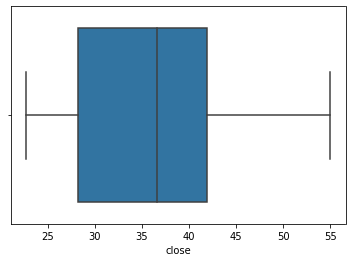

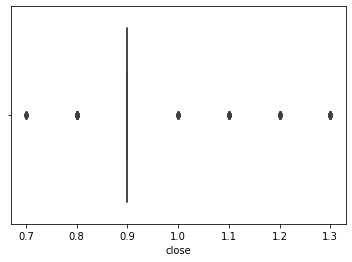

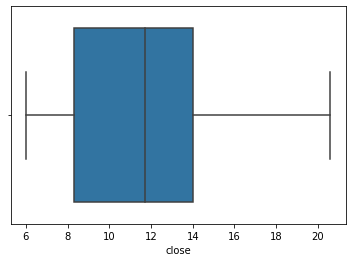

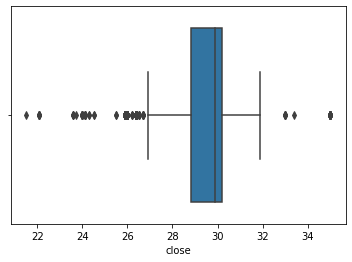

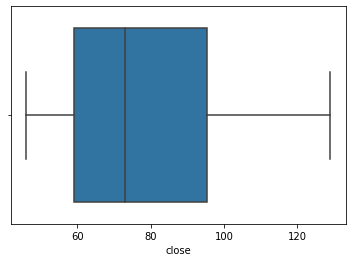

In [ ]:
for df in lst: 
  sns.boxplot(x=df['close'])
  plt.show()

### ACF and PACF: 

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    result = adfuller(df.close)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
for df in lst:
  df = df.sort_values(by='snapshot_date',ascending=True) 
  check_stationarity(df)

ADF Statistic: -1.989259
p-value: 0.291302
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Non-stationary
ADF Statistic: -7.309367
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Stationary
ADF Statistic: -3.719713
p-value: 0.003844
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Stationary
ADF Statistic: -3.293584
p-value: 0.015168
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Stationary
ADF Statistic: -2.192803
p-value: 0.208868
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Non-stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def acf_pacf(sample):

  plot_acf(sample['close'])
  plot_pacf(sample['close'], method='ols')

  plt.tight_layout()
  plt.show()

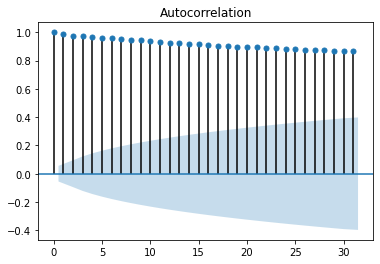

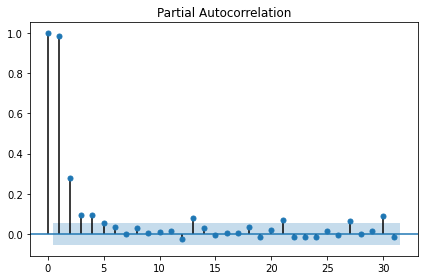

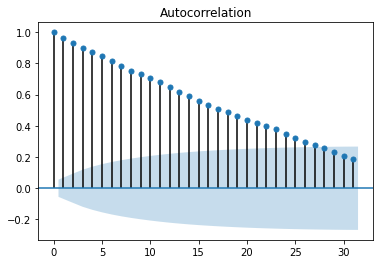

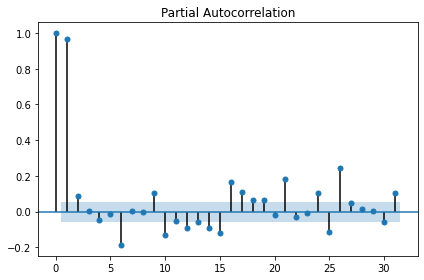

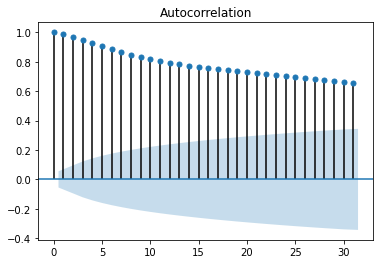

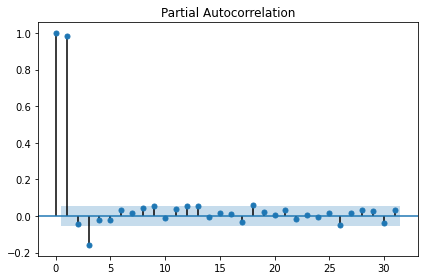

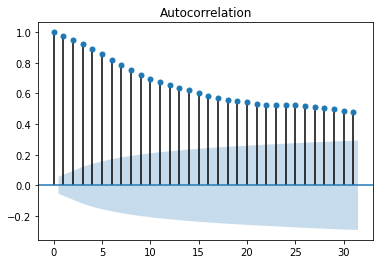

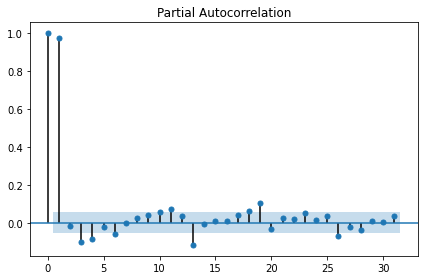

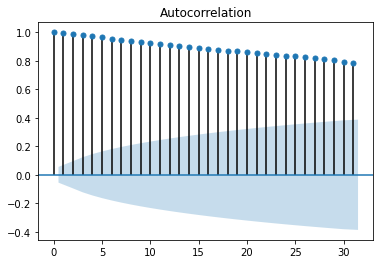

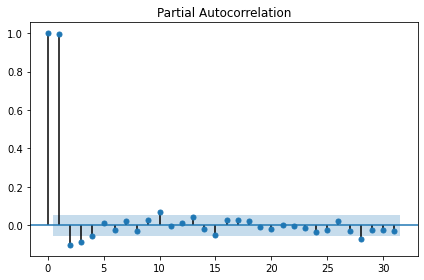

In [ ]:
for df in lst: 
   df = df.sort_values(by='snapshot_date',ascending=True) 
   acf_pacf(df)